<!--TABLE OF CONTENTS-->
<b>Contents:</b>
- [1. Выбор локации для скважины](#1.-Выбор-локации-для-скважины)
  - [1.1. Загрузка и подготовка данных](#1.1.-Загрузка-и-подготовка-данных)
    - [1.1.1. Загрузка данных](#1.1.1.-Загрузка-данных)
    - [1.1.2. Предварительный анализ и обработка даных](#1.1.2.-Предварительный-анализ-и-обработка-даных)
    - [1.1.3. Разделение на обучающую и валидационную выборки](#1.1.3.-Разделение-на-обучающую-и-валидационную-выборки)
  - [1.2. Обучение и проверка модели](#1.2.-Обучение-и-проверка-модели)
  - [1.3. Подготовка к расчёту прибыли](#1.3.-Подготовка-к-расчёту-прибыли)
    - [1.3.1. Ключевые значения для расчетов](#1.3.1.-Ключевые-значения-для-расчетов)
    - [1.3.2. Объем сырья для безубыточности новой скважины](#1.3.2.-Объем-сырья-для-безубыточности-новой-скважины)
  - [1.4. Расчёт прибыли и рисков](#1.4.-Расчёт-прибыли-и-рисков)
    - [1.4.1. Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели](#1.4.1.-Функция-для-расчёта-прибыли-по-выбранным-скважинам-и-предсказаниям-модели)
    - [1.4.2. Риски и прибыль для каждого региона:](#1.4.2.-Риски-и-прибыль-для-каждого-региона:)
  - [1.5. Общий вывод](#1.5.-Общий-вывод)

# 1. Выбор локации для скважины

Допустим, вы работаете в добывающей компании и нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.
<li><em>id</em> — уникальный идентификатор скважины;</li><li><em>f0, f1, f2</em> — три признака точек (неважно, что они означают, но сами признаки значимы);</li><li><em>product</em> — объём запасов в скважине (тыс. баррелей).</li></ul><div class="paragraph"><strong>Условия задачи:</strong></div><ul><li>Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).</li><li>При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.</li><li>Бюджет на разработку скважин в регионе — 10 млрд рублей.</li><li>При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.</li><li>После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.</li></ul><div class="paragraph">Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.</div>

## 1.1. Загрузка и подготовка данных

In [1]:
try:
    %load_ext lab_black
except:
    "no lab_black"

Импортируем нужные библиотеки и функции:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

### 1.1.1. Загрузка данных

Считаем данные из файлов в массив датафреймов:

In [3]:
data_array.append(pd.read_csv("/datasets/geo_data_0.csv"))
data_array.append(pd.read_csv("/datasets/geo_data_1.csv"))
data_array.append(pd.read_csv("/datasets/geo_data_2.csv"))

In [4]:
for data in data_array:
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

In [5]:
for data in data_array:
    display(data.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


### 1.1.2. Предварительный анализ и обработка даных

Уберем дубликаты из датафреймов:

In [6]:
for i, data in enumerate(data_array):
    print(
        f"Count of records with duplicated id in Region {i+1}:",
        data.id.duplicated().sum(),
    )

Count of records with duplicated id in Region 1: 10
Count of records with duplicated id in Region 2: 4
Count of records with duplicated id in Region 3: 4


In [7]:
for i, _ in enumerate(data_array):
    data_array[i] = data_array[i].drop_duplicates(subset="id").reset_index(drop=True)

In [8]:
for i, data in enumerate(data_array):
    print(
        f"Count of records with duplicated id in Region {i+1}:",
        data.id.duplicated().sum(),
    )

Count of records with duplicated id in Region 1: 0
Count of records with duplicated id in Region 2: 0
Count of records with duplicated id in Region 3: 0


Добавим в данные шум для сравнения c реальными признаками:

In [9]:
for i, data in enumerate(data_array):
    data["noise"] = np.random.randn(len(data))

Построим ящики с усами для признаков:

Region 1
                 f0            f1            f2         noise
count  99990.000000  99990.000000  99990.000000  99990.000000
mean       0.500454      0.250141      2.502629      0.002514
std        0.871844      0.504430      3.248149      0.999791
min       -1.408605     -0.848218    -12.088328     -4.542516
25%       -0.072572     -0.200877      0.287784     -0.673466
50%        0.502405      0.250252      2.515969      0.000993
75%        1.073626      0.700640      4.715035      0.674853
max        2.362331      1.343769     16.003790      4.368917

Region 2
                 f0            f1            f2         noise
count  99996.000000  99996.000000  99996.000000  99996.000000
mean       1.141209     -4.796608      2.494501     -0.003762
std        8.965815      5.119906      1.703579      0.996560
min      -31.609576    -26.358598     -0.018144     -4.265205
25%       -6.298551     -8.267985      1.000021     -0.675329
50%        1.153055     -4.813172      2.011475    

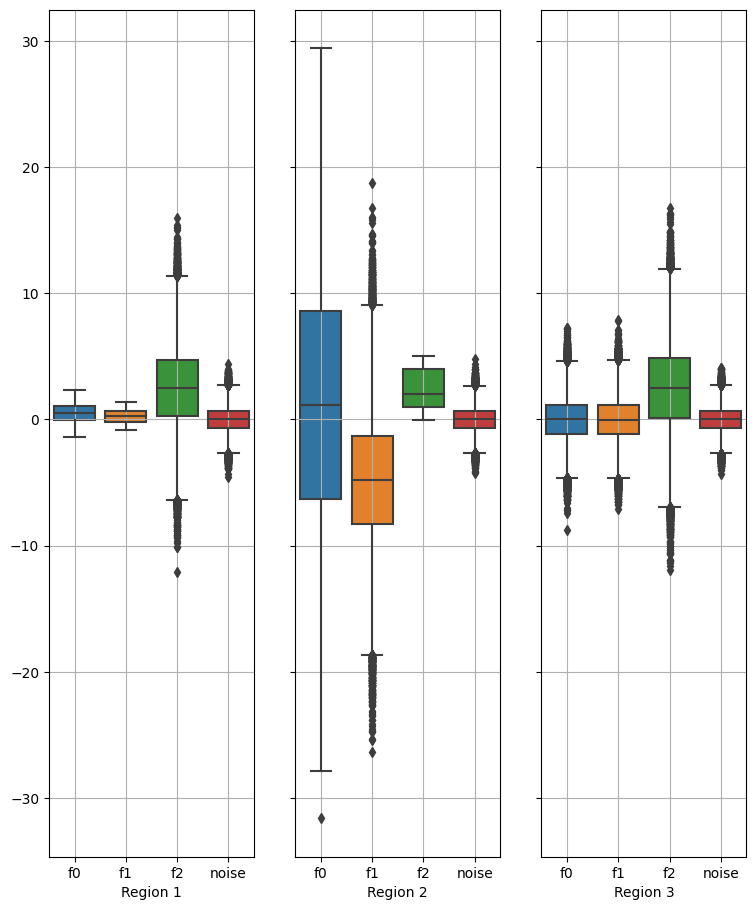

In [10]:
_, ax = plt.subplots(1, 3, figsize=(9, 11), sharey=True)

for i, data in enumerate(data_array):
    ax2 = sns.boxplot(data=data.drop("product", axis=1), ax=ax[i])
    ax2.grid()
    ax2.set_xlabel(f"Region {i+1}")
    print(f"Region {i+1}")
    print(data.drop("product", axis=1).describe())
    print()
plt.show()

Видим что по регионам значения признаков сильно отличаются, у многих признаков большое число выбросов. Обработать их затруднительно, т.к. природу этих выбросов мы не знаем.

А также посмотрим на боксплоты для целевого признака (product) по регионам:

Region 1
count    99990.000000
mean        92.499684
std         44.288304
min          0.000000
25%         56.497069
50%         91.847928
75%        128.563699
max        185.364347
Name: product, dtype: float64

Region 2
count    99996.000000
mean        68.823916
std         45.944663
min          0.000000
25%         26.953261
50%         57.085625
75%        107.813044
max        137.945408
Name: product, dtype: float64

Region 3
count    99996.000000
mean        94.998342
std         44.749573
min          0.000000
25%         59.450028
50%         94.925026
75%        130.586815
max        190.029838
Name: product, dtype: float64



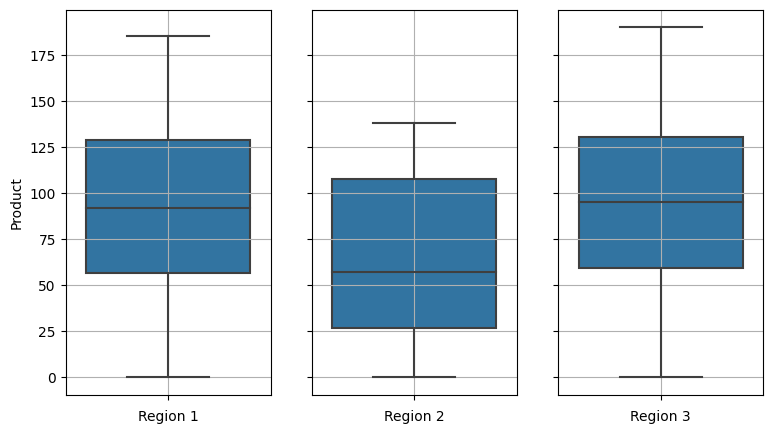

In [11]:
_, ax = plt.subplots(1, 3, figsize=(9, 5), sharey=True)
for i, data in enumerate(data_array):
    ax2 = sns.boxplot(data=data["product"], ax=ax[i])
    ax2.grid()
    ax2.set_xlabel(f"Region {i+1}")

    ax2.set_xticklabels("")
    if i == 0:
        ax2.set_ylabel("Product")
    print(f"Region {i+1}")
    print(data["product"].describe())
    print()


plt.show()

Здесь выбросов нет, у первого и третьего региона очень похожие диграммы размаха, у второго региона более низкие значения квантилей, медианы и наблюдаемого максимума.

Посмотрим на взаимозависимости между признаками с помощью pairplot и корреляционной матрицы:

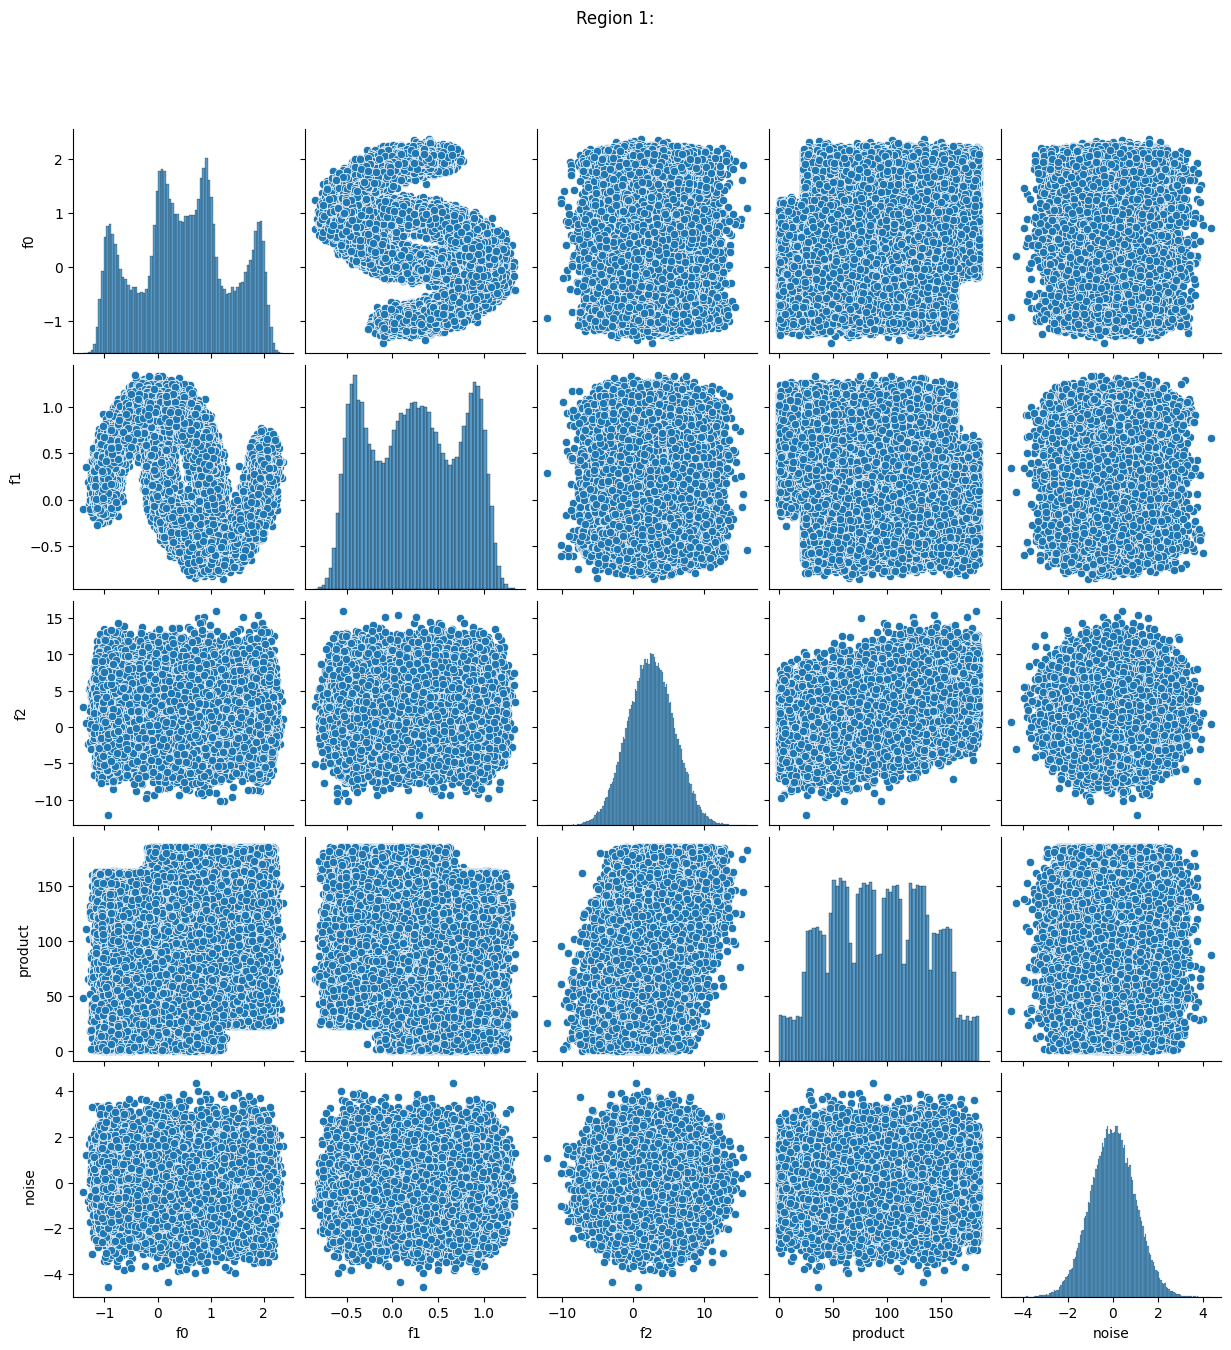

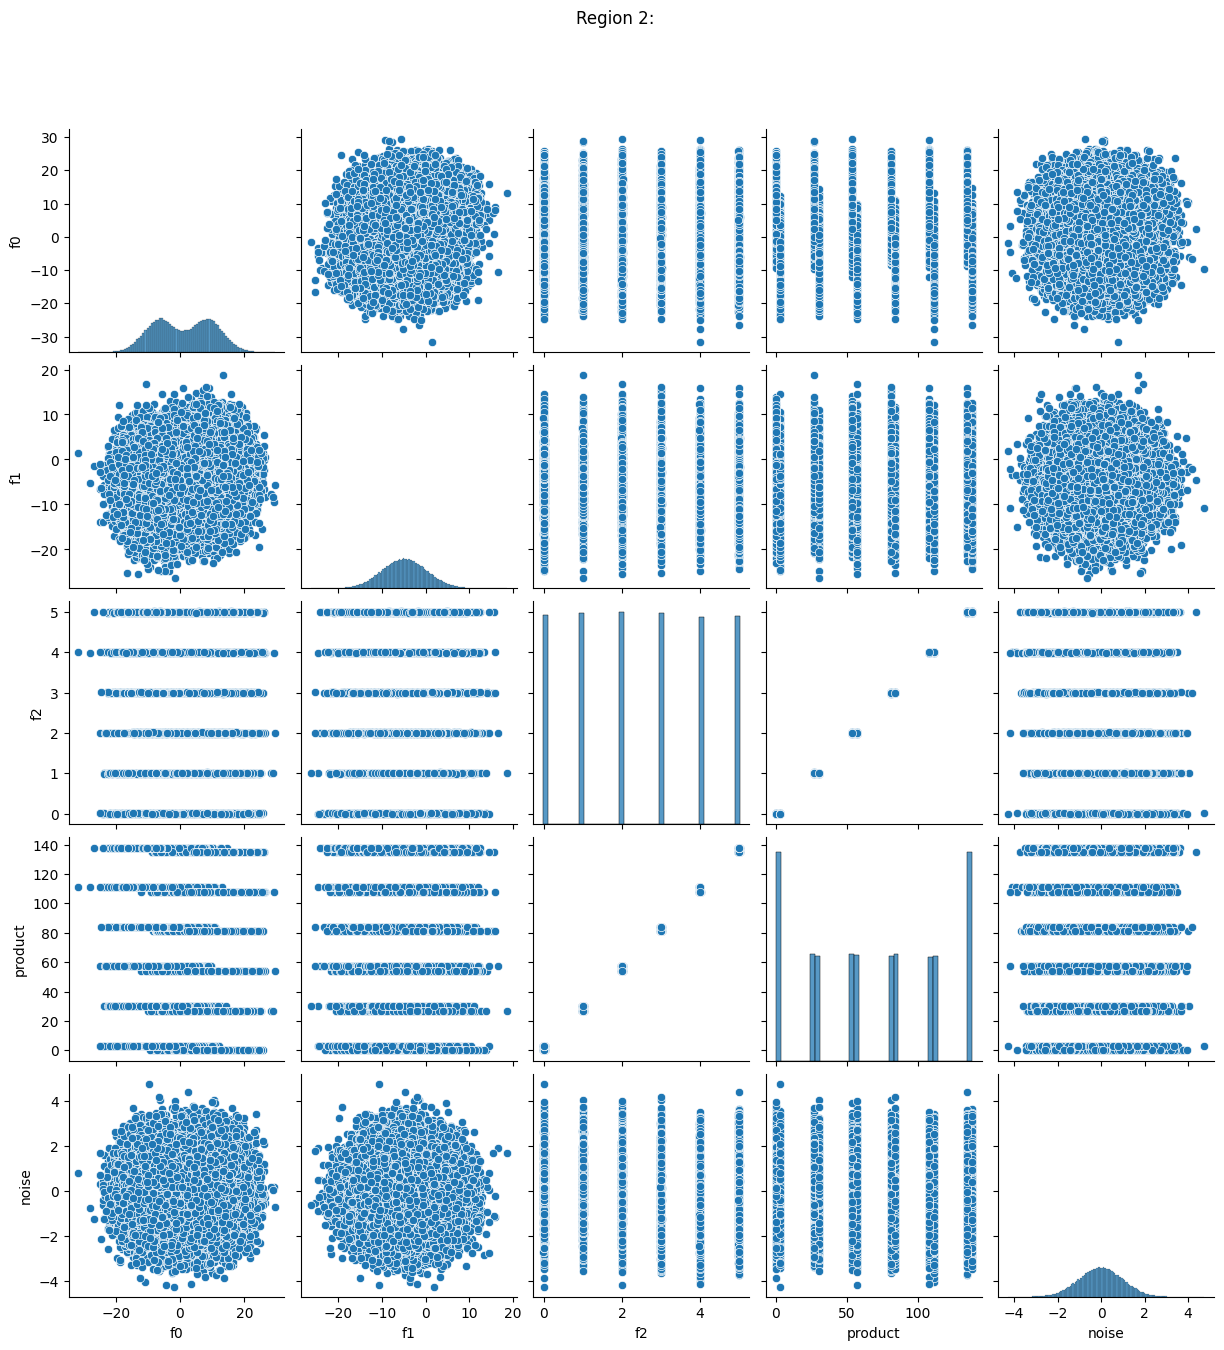

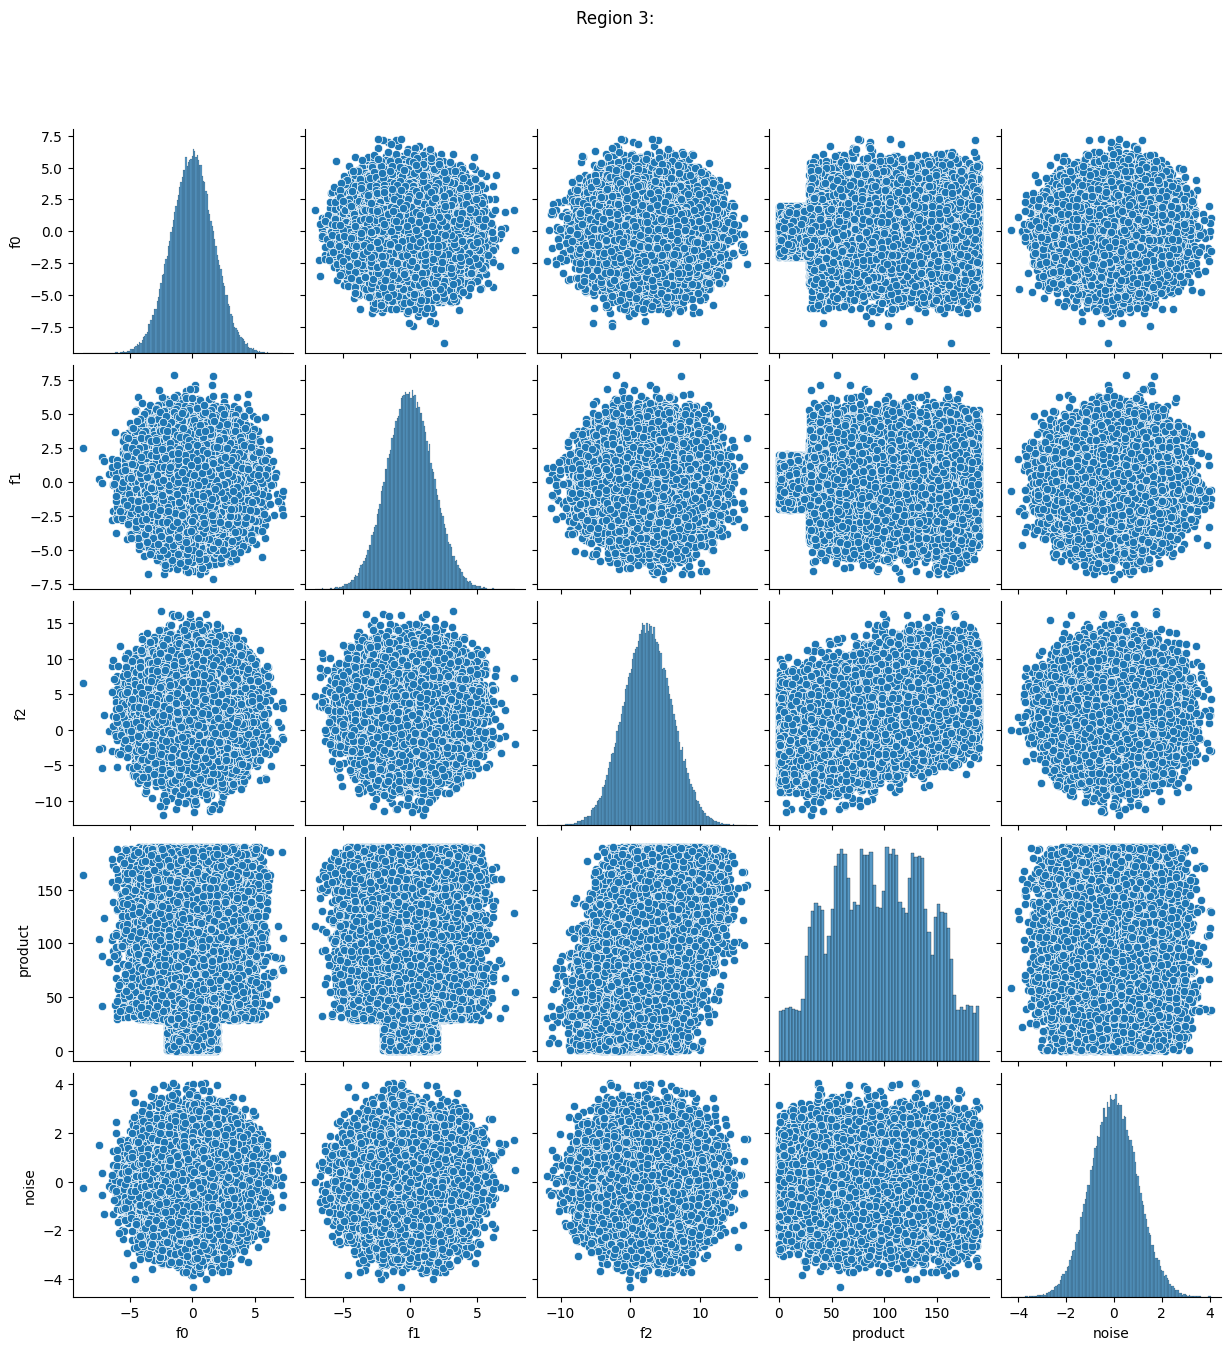

In [12]:
for i, data in enumerate(data_array):
    ax2 = sns.pairplot(data)
    ax2.fig.suptitle(f"Region {i+1}:", y=1.08)
    plt.show()

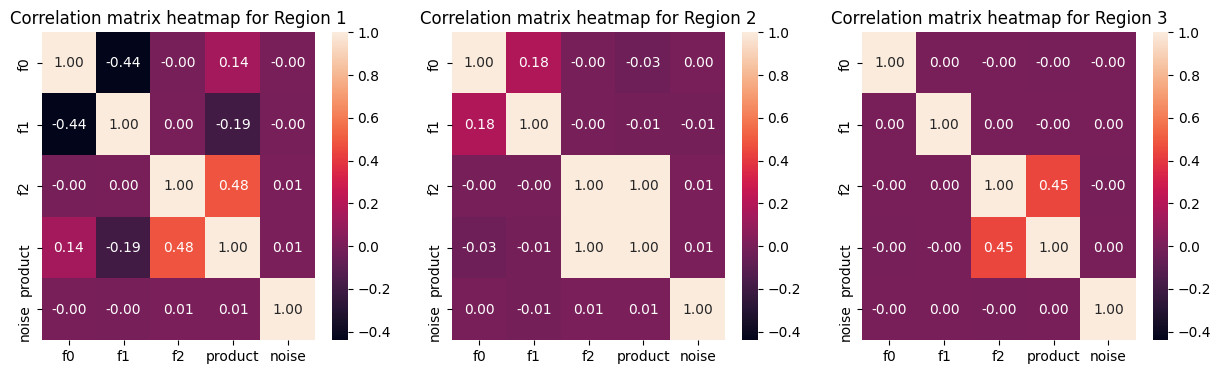

In [13]:
# calculating min and max for all regions for same colormap
vmin = min([data.corr().min().min() for data in data_array])
vmax = max([data.corr().max().max() for data in data_array])

_, ax = plt.subplots(1, 3, figsize=(15, 4))
for i, data in enumerate(data_array):
    corr = data.corr()
    fig = sns.heatmap(
        corr,
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values,
        annot=True,
        fmt=".2f",
        ax=ax[i],
        vmin=vmin,
        vmax=vmax,
    )
    fig.set_title(f"Correlation matrix heatmap for Region {i+1}")
plt.show()

<b>Выводы: </b> 
* В первом регионе самый высокий коэффициент Пирсона имеет признак f2 (0.48), на pairplot-графике также виден "линейный наклон" группы точек для связи f2-product, хоть они и находятся достаточно разреженно относительно их срединной линии. Два других признака имеют крайне слабую линейную прямую (коэф. Пирсона 0.14) и обратную (коэф. Пирсона -0.19) связь со значениями запасов.
* Во втором регионе присутствует линейная связь product от f2 (коэффициент Пирсона 1.00). На pairplot графике также видна эта линейная связь, причем значения f2 и product дискретные, что видно также на их гистограммах. Остальные признаки схожи и по корреляционным значениям и по pairplot-графикам с параметрами шума (искуственный признак noise)
* В третьем регионе единственный признак имеющий связь хоть сколько близкую к линейной с объемом запасов - это также f2 (коэф. Пирсона 0.45), остальные признаки также схожи и по корреляционным значениям и по pairplot-графикам с параметрами шума (искуственный признак noise).

### 1.1.3. Разделение на обучающую и валидационную выборки

Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.

In [14]:
X_train_arr_arr, X_valid_arr, y_train_arr, y_valid_arr = [], [], [], []
for i, data in enumerate(data_array):
    X_train_arr_arr_i, X_valid_arr_i, y_train_arr_i, y_valid_arr_i = train_test_split(
        data.drop(["product", "id"], axis=1),
        data["product"],
        test_size=0.25,
        random_state=3_11_22,
    )
    X_train_arr_arr.append(X_train_arr_arr_i.reset_index(drop=True))
    X_valid_arr.append(X_valid_arr_i.reset_index(drop=True))
    y_train_arr.append(y_train_arr_i.reset_index(drop=True))
    y_valid_arr.append(y_valid_arr_i.reset_index(drop=True))
    print()
    print(f"Region {i+1}")

    print("Total records count:", data.shape[0])
    print("Train records count:", X_train_arr_arr_i.shape[0])
    print("Validation records count:", X_valid_arr_i.shape[0])


Region 1
Total records count: 99990
Train records count: 74992
Validation records count: 24998

Region 2
Total records count: 99996
Train records count: 74997
Validation records count: 24999

Region 3
Total records count: 99996
Train records count: 74997
Validation records count: 24999


## 1.2. Обучение и проверка модели

In [15]:
# aux function to write different data as collection to array to be converted to DataFrame;
def add_model_record(results_array, **kwargs):
    results_array.append(kwargs)

In [16]:
# aux function to save and print model results
def process_model_results(model, y, X):
    y_pred = model.predict(X)
    r2_score_res = model.score(X, y)
    rmse_res = mean_squared_error(y, y_pred, squared=False)
    add_model_record(
        model_validation_results,
        region_id=i,
        y_pred=y_pred,
        y_true=y,
        rmse=rmse_res,
        r2_score=r2_score_res,
    )
    print(f"--Results for Region {i+1}--")
    print("R2 score:", r2_score_res)
    print("RMSE score:", rmse_res)
    print("Mean product predicted:", y_pred.mean())
    print("Linear regression coefs:", model.coef_)
    print("Linear regression intercept:", model.intercept_)
    print()

In [17]:
model_validation_results = []

for i in range(len(y_train_arr)):
    model = LinearRegression(n_jobs=-1)
    model.fit(X_train_arr_arr[i], y_train_arr[i])
    process_model_results(model, y_valid_arr[i], X_valid_arr[i])

--Results for Region 1--
R2 score: 0.27467611770132205
RMSE score: 37.709731017979614
Mean product predicted: 92.61019197613403
Linear regression coefs: [  3.73637282 -14.29098521   6.59927703   0.12157297]
Linear regression intercept: 77.71171831951229

--Results for Region 2--
R2 score: 0.9996215024978056
RMSE score: 0.8932146420207456
Mean product predicted: 68.80520737652026
Linear regression coefs: [-1.45170993e-01 -2.16698857e-02  2.69494507e+01 -3.21935523e-03]
Linear regression intercept: 1.6606625696538941

--Results for Region 3--
R2 score: 0.198694971542828
RMSE score: 40.162052605312006
Mean product predicted: 95.08380350753217
Linear regression coefs: [ 0.00667046 -0.07298505  5.73107882  0.31135321]
Linear regression intercept: 80.86333583026936



<b>Выводы: </b> 
* Ожидаемо, линейная регрессия лучше всего смогла предсказать значения запасов во втором регионе, где наблюдалась линейная связь с признаком f2, RMSE получился крайне низким (меньше единицы), R2-оценка почти 1. Но средние запасы в этом регионе модель выдала ниже чем в остальных. 
* Для первого и третьго региона средние запасы выше примерно на 40 процентов, чем во втором, но точностью модель не блещет: RMSE на уровне 37-40 , что опять же составляет примерно 40 процентов от средних запасов в этих регионах.
* Однозначного лидера здесь выделить нельзя: в одном случае средний запас предсказанного сырья невысок, в других случаях - низкая точность предсказаний не позволяет довериться получившимся значениям средних запасов.

## 1.3. Подготовка к расчёту прибыли

### 1.3.1. Ключевые значения для расчетов

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.</li><li>Бюджет на разработку скважин в регионе — 10 млрд рублей.</li><li>При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [1]:
OILWELLS_RANDOM_COUNT = 500
OILWELLS_FILTERED_COUNT = 200
BUDGET = 10e9
INCOME_PER_PRODUCT = 450_000

### 1.3.2. Объем сырья для безубыточности новой скважины

In [19]:
breakeven_product_mean = BUDGET / INCOME_PER_PRODUCT / OILWELLS_FILTERED_COUNT
print(f"Mean product to reach breakeven point: {breakeven_product_mean:.2f}")

Mean product to reach breakeven point: 111.11


In [20]:
model_validation_df = pd.DataFrame(model_validation_results)

In [21]:
print("Mean and standard deviation of predicted product per region:")
[
    print(
        f"Region {i+1}: mean - {product_predicted.mean()}, std - {product_predicted.std()}"
    )
    for i, product_predicted in enumerate(model_validation_df.y_pred.values)
]
print()

print("Mean and standard deviation of real product per region:")
[
    print(f"Region {i+1}: mean - {product_real.mean()}, std - {product_real.std()}")
    for i, product_real in enumerate(model_validation_df.y_true.values)
]
print()

Mean and standard deviation of predicted product per region:
Region 1: mean - 92.61019197613403, std - 23.296010994084916
Region 2: mean - 68.80520737652026, std - 45.88813980263398
Region 3: mean - 95.08380350753217, std - 19.835562757341403

Mean and standard deviation of real product per region:
Region 1: mean - 92.51816287682861, std - 44.2788295770277
Region 2: mean - 68.80334768381644, std - 45.91271881203783
Region 3: mean - 94.42272530963783, std - 44.8668575678692



<b>Выводы: </b> Средние предсказаные и реальные запасы в регионах примерно одинаковые (93/68/94) и не дотягивают до необходимого для безубыточности объема запасов скважины (~111). Но так как по условиям задачи мы выбираем 200 лучших из 500 отобранных скважин, то с учетом рассеивания значений случайной величины (см. среднеквадратическое отклонение выше) теоретически безубыточность может быть достигнута. На практике проверим эту гипотезу далее.

## 1.4. Расчёт прибыли и рисков

In [22]:
# aux func for formatting large nums
def human_format(num):
    num = float("{:.3g}".format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return "{}{}".format(
        "{:f}".format(num).rstrip("0").rstrip("."), ["", "K", "M", "B", "T"][magnitude]
    )

### 1.4.1. Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [23]:
# func to calculate the profit for selected by model predictions oilwells
def profit_for_selected_oilwells(
    oilwells_product_predicted, oilwells_product_true, OILWELLS_FILTERED_COUNT_param
):
    return (
        oilwells_product_true[
            oilwells_product_predicted.sort_values(ascending=False)[
                :OILWELLS_FILTERED_COUNT_param
            ].index  # indexes of selected best predictions
        ].sum()  # sum of real product
        * INCOME_PER_PRODUCT
        - BUDGET
    )

### 1.4.2. Риски и прибыль для каждого региона:

Применяем технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли. Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [24]:
state = np.random.RandomState(3_11_22)

# for every region
for i, y_pred_region in enumerate(model_validation_df.y_pred.values):
    # array to store profits calculated for btsrp samples
    profit_btsrp = []

    # bootstrapping 1000 samples
    for _ in range(0, 1000):

        y_pred_region_sampled = pd.Series(y_pred_region).sample(
            n=OILWELLS_RANDOM_COUNT, replace=True, random_state=state
        )

        profit_btsrp.append(
            profit_for_selected_oilwells(
                y_pred_region_sampled,
                model_validation_df.y_true.values[i],
                OILWELLS_FILTERED_COUNT,
            )
        )

    # saving results for region
    model_validation_results[i]["profit_btsrp"] = profit_btsrp

Выведем полученные данные и построим совмещенную гистограмму для регионов. Красная заштрихованная область на графике гистограмм обозначает область убытков:

Region 1: 
Mean profit: 428M
95% confidence interval: ('-55.6M', '925M')
Probability of losses: 4.1000000000000005 %

Region 2: 
Mean profit: 448M
95% confidence interval: ('68.1M', '820M')
Probability of losses: 1.3 %

Region 3: 
Mean profit: 310M
95% confidence interval: ('-223M', '862M')
Probability of losses: 12.6 %



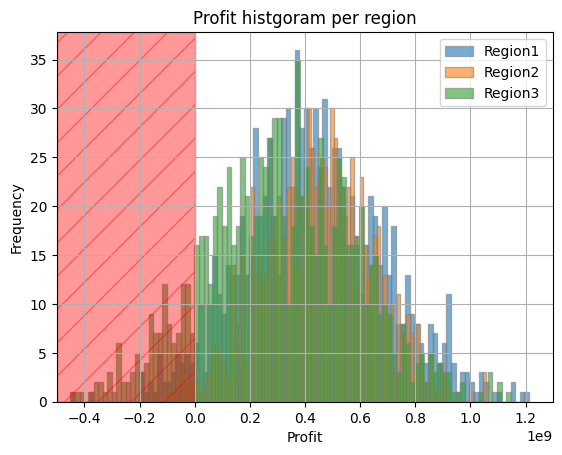

In [25]:
fig, ax = plt.subplots()
plt.title("Profit histgoram per region")

for i, region_results in enumerate(model_validation_results):
    profit_btsrp = pd.Series(region_results["profit_btsrp"])
    print(f"Region {i+1}: ")
    print("Mean profit:", human_format(profit_btsrp.mean()))
    print(
        "95% confidence interval:",
        (
            human_format(profit_btsrp.quantile(0.025)),
            human_format(profit_btsrp.quantile(0.975)),
        ),
    )
    profit_btsrp.hist(
        ax=ax, bins=100, label=f"Region{i+1}", alpha=0.6, edgecolor="gray"
    )
    print(
        "Probability of losses:",
        (profit_btsrp < 0).sum() / len(profit_btsrp) * 100,
        "%",
    )
    print()

ax.set_ylabel("Frequency")
ax.set_xlabel("Profit")
ax.legend()
ax.set_xlim(-0.5e9)
# ax.axvline(x=0, color="red")
ax.axvspan(-0.5e9, 0, alpha=0.4, color="red", hatch="/")
plt.show()

На графике мы видим, что распределение для 1000 выборок все еще недостаточно близко к нормальному - много шумов. Увеличим число выборок до 10к чтобы получить более статистически значимые результаты для среднего, доверительного интервала и вероятности потерь:

In [26]:
state = np.random.RandomState(3_11_22)

# for every region
for i, y_pred_region in enumerate(model_validation_df.y_pred.values):
    # array to store profits calculated for btsrp samples
    profit_btsrp = []

    # bootstrapping 1000 samples
    for _ in range(0, 10000):

        y_pred_region_sampled = pd.Series(y_pred_region).sample(
            n=OILWELLS_RANDOM_COUNT, replace=True, random_state=state
        )

        profit_btsrp.append(
            profit_for_selected_oilwells(
                y_pred_region_sampled,
                model_validation_df.y_true.values[i],
                OILWELLS_FILTERED_COUNT,
            )
        )

    # saving results for region
    model_validation_results[i]["profit_btsrp"] = profit_btsrp

Выведем полученные данные для 10к выборок и также построим совмещенную гистограмму для регионов:

Region 1: 
Mean profit: 432M
95% confidence interval: ('-76.8M', '937M')
Probability of losses: 4.9399999999999995 %

Region 2: 
Mean profit: 451M
95% confidence interval: ('50.4M', '853M')
Probability of losses: 1.29 %

Region 3: 
Mean profit: 313M
95% confidence interval: ('-214M', '830M')
Probability of losses: 12.030000000000001 %



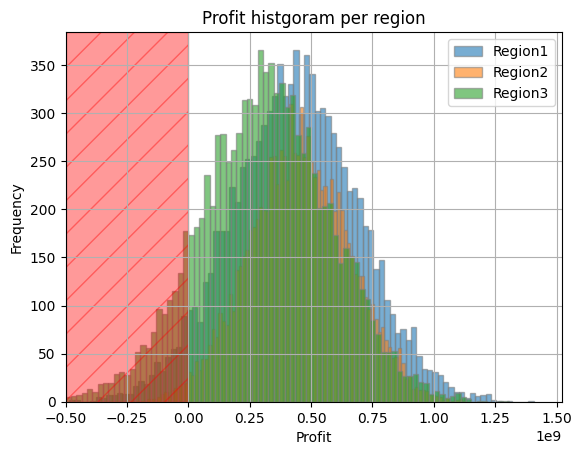

In [27]:
fig, ax = plt.subplots()
plt.title("Profit histgoram per region")

for i, region_results in enumerate(model_validation_results):
    profit_btsrp = pd.Series(region_results["profit_btsrp"])
    print(f"Region {i+1}: ")
    print("Mean profit:", human_format(profit_btsrp.mean()))
    print(
        "95% confidence interval:",
        (
            human_format(profit_btsrp.quantile(0.025)),
            human_format(profit_btsrp.quantile(0.975)),
        ),
    )
    profit_btsrp.hist(
        ax=ax, bins=100, label=f"Region{i+1}", alpha=0.6, edgecolor="gray"
    )
    print(
        "Probability of losses:",
        (profit_btsrp < 0).sum() / len(profit_btsrp) * 100,
        "%",
    )
    print()

ax.set_ylabel("Frequency")
ax.set_xlabel("Profit")
ax.legend()
ax.set_xlim(-0.5e9)
# ax.axvline(x=0, color="red")
ax.axvspan(-0.5e9, 0, alpha=0.4, color="red", hatch="/")
plt.show()

<b>Вывод</b>: По условиям задачи после оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5% - единственный отвечающий этому условию регион - Region 2 (вероятность убытков примерно 1.3%), кроме того, в этом же регионе получилась самая высокая средняя прибыль (451 миллион). Для этого региона 95% доверительный интервал: (50.4 миллиона - 853 миллиона). При этом для получения более статистически значимых результатов мы увеличили числ выборок на порядок до 10к.

## 1.5. Общий вывод

Выполнив предварительный анализ данных мы обнаружили следующие особенности данных по регионам:
* В <b>первом регионе</b> самый высокий коэффициент Пирсона имеет признак f2 (0.48), на pairplot-графике также виден "линейный наклон" группы точек для связи f2-product, хоть они и находятся достаточно разреженно относительно их срединной линии. Два других признака имеют крайне слабую линейную прямую (коэф. Пирсона 0.14) и обратную (коэф. Пирсона -0.19) связь со значениями запасов.
* Во <b>втором регионе</b> присутствует линейная связь product от f2 (коэффициент Пирсона 1.00). На pairplot графике также видна эта линейная связь, причем значения f2 и product дискретные, что видно также на их гистограммах. Остальные признаки схожи и по корреляционным значениям и по pairplot-графикам с параметрами шума (искуственный признак noise)
* В <b>третьем регионе</b> единственный признак имеющий связь хоть сколько близкую к линейной с объемом запасов - это также f2 (коэф. Пирсона 0.45), остальные признаки также схожи и по корреляционным значениям и по pairplot-графикам с параметрами шума (искуственный признак noise).

<b>Средние предсказаные и реальные запасы</b> в регионах примерно одинаковые (93/68/94) и не дотягивают до необходимого для <b>безубыточности</b> объема запасов скважины (~111). Но так как по условиям задачи мы выбираем 200 лучших из 500 отобранных скважин, то с учетом рассеивания значений случайной величины (см. среднеквадратическое отклонение выше) безубыточность может быть достигнута, что мы и доказали далее.

После оценки рисков оставляем регион в котором <b>вероятность убытков меньше 2.5%</b> - единственный отвечающий этому условию регион - <b>Region 2</b> (вероятность убытков примерно 1.3%), кроме того, в этом же регионе получилась <b>самая высокая средняя прибыль (451 миллион)</b>. Для этого региона <b>95% доверительный интервал: (50.4 миллиона - 853 миллиона)</b>. При этом для получения более статистически значимых результатов мы увеличили число выборок на порядок до 10к.

Таким образом, <b>для разработки скважин предлагается второй регион</b>, относительно которого у модели получились самые точные результаты предсказаний и в котором мы получили самые высокие оценки бизнес-параметроов.